Problem 1.
The temperature extremes in Seoul for each month, starting in January, are given by (in
degrees Celsius):
max: 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18
min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58
• Plot these temperature extremes.
• Define a function that can describe min and max temperatures. Hint: this function
has to have a period of 1 year. Hint: include a time offset.
• Fit this function to the data with scipy.optimize.curve fit() .
• Plot the result. Is the fit reasonable? If not, why?
• Is the time offset for min and max temperatures the same within the fit accuracy?
https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/

max = {17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18}

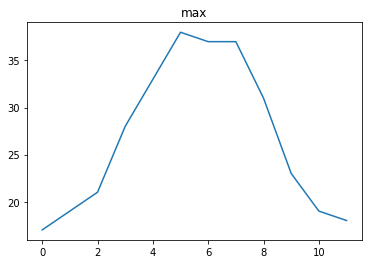

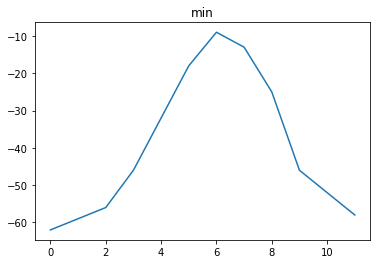

In [86]:
max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

plt.title("max")
plt.plot(max)
plt.show()
plt.title("min")
plt.plot(min)
plt.show()

Problem 2.
The six-hump camelback function
f(x, y) = (4 − 2.1x
2 +
x
4
3
)x
2 + xy + (4y
2 − 4)y
2
(1)
has multiple global and local minima. Find the global minima of this function.
Hints:
Variables can be restricted to −2 < x < 2 and −1 < y < 1.
• Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
• Use scipy.optimize.minimize(), optionally trying out several of its methods.
• How many global minima are there, and what is the function value at those points?
What happens for an initial guess of (x, y) = (0, 0) ?

<function matplotlib.pyplot.show(*args, **kw)>

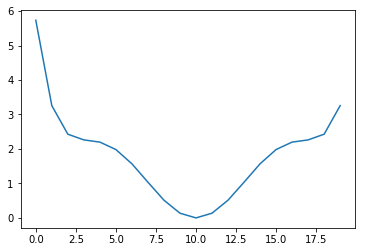

In [65]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

def f(x,y) :
    return (4 - 2.1*x*x + x*x*x*x/3)*x*x +x*y+ (4*y*y-4)*y*y 

x = np.arange(-2, 2, 0.2)
y = np.arange(-1, 1, 0.1)


plt.plot(f(x,y))
plt.show

Problem 3.
Using SymPy, confirm that the stationary points in the previous question are minima.
Remember that:
Let (a, b) be a stationary point, so that fx = 0 and fy = 0 at (a, b). Then:
• if fxxfyy − f
2
xy < 0 at (a, b) then (a, b) is a saddle point.
• if fxxfyy − f
2
xy > 0 at (a, b) then (a, b) is either a maximum or a minimum.
Distinguish between these as follows:
• if fxx < 0 and fyy < 0 at (a, b) then (a, b) is a maximum point.
• if fxx > 0 and fyy > 0 at (a, b) then (a, b) is a minimum point.
If fxxfyy −f
2
xy = 0 then anything is possible. More advanced methods are required to classify
the stationary point properly.

In [59]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym 

def sixhump(x,y) :
    return ((4 - 2.1*x*x + x**4/3)*x**2 +x*y+ (-4+4*y**2)*y**2)



In [64]:
print(len(x),len(y))

40 20


In [76]:
import sympy as sym 
x = sym.Symbol('x')
y = sym.Symbol('y')
dx = sym.diff((4 - 2.1*x*x + x**4/3)*x**2 +x*y+ (-4+4*y**2)*y**2,x)
dxx = sym.diff((dx),x)
dy = sym.diff((4 - 2.1*x*x + x**4/3)*x**2 +x*y+ (-4+4*y**2)*y**2,y)
dyy = sym.diff((dy),y)
dxy = sym.diff(dx,y)
print(dx)
print(dxx)
print(dy)
print(dyy)
print(dxy)

x**2*(4*x**3/3 - 4.2*x) + 2*x*(x**4/3 - 2.1*x**2 + 4) + y
2*x**4/3 + x**2*(4*x**2 - 4.2) - 4.2*x**2 + 4*x*(4*x**3/3 - 4.2*x) + 8
x + 8*y**3 + 2*y*(4*y**2 - 4)
48*y**2 - 8
1


In [78]:
sym.simplify(dxx-dyy)

10.0*x**4 - 25.2*x**2 - 48.0*y**2 + 16.0